In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
max_num_threads = 12
max_n = 2500
experiments = 3

data = np.full((max_num_threads,(max_n-100)//200 + 1,experiments),np.nan)

for experiment in range(experiments):
    for i in range(len(data)):
        a = np.genfromtxt(f'../data/{experiment+1}.{i+1}.txt')
        data[i,:,experiment] = a[:,1]
        
ns = a[:,0]
threads = np.arange(1,max_num_threads+1)

Text(0, 0.5, 'Threads')

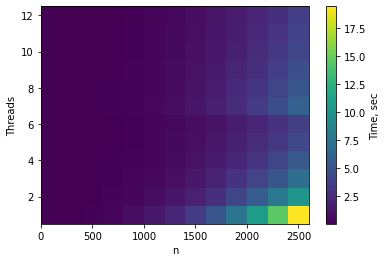

In [52]:
pcm = plt.pcolormesh(ns, threads, data.mean(axis=2))
plt.colorbar(pcm, label='Time, sec')
plt.xlabel('n')
plt.ylabel('Threads')

In [68]:
ns[5]

1100.0

In [74]:
for i in range(12):
    print(f'{data[i,5,2]:.2e}')

1.95e+01
1.01e+01
6.99e+00
5.29e+00
4.31e+00
3.62e+00
5.94e+00
5.21e+00
4.68e+00
4.17e+00
3.82e+00
3.50e+00


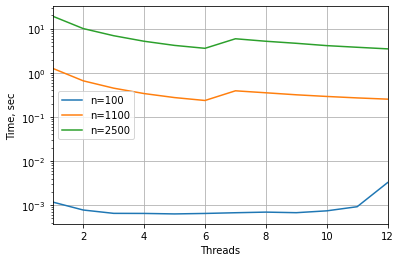

In [78]:
for i in [0, 5, -1]:
    plt.plot(threads, data.min(axis=2)[:,i], label=f'n={int(ns[i]):}')
plt.grid()
plt.legend()
plt.xlim(1,12)
plt.yscale('log')
plt.xlabel('Threads')
plt.ylabel('Time, sec')
plt.savefig('t_vs_threads.png', dpi=250, bbox_inches='tight')

In [79]:
speedup = np.full((max_num_threads,(max_n-100)//200+1),np.nan)
speedup_std = np.full((max_num_threads,(max_n-100)//200 + 1),np.nan)
for i in range(len(data)):
    speedup[i] = data[0].min(axis=-1) / data[i].min(axis=-1)
#     speedup_std[i] = (data[0] / data[i]).std(axis=-1)

Text(0, 0.5, 'Threads')

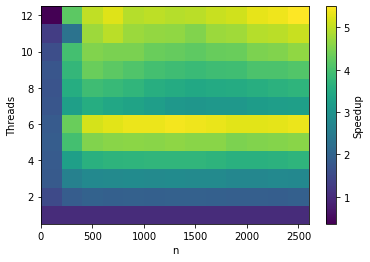

In [80]:
pcm = plt.pcolormesh(ns, threads, speedup)
plt.colorbar(pcm, label='Speedup')
plt.xlabel('n')
plt.ylabel('Threads')

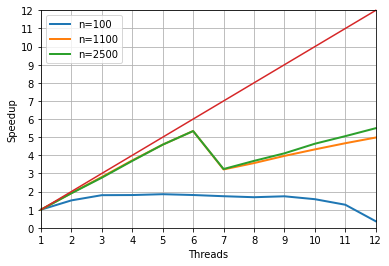

In [86]:
for i in [0,5,-1]:
    plt.plot(threads, speedup[:,i], '-', linewidth=2, clip_on=False, label=f'n={int(ns[i])}')
plt.plot(threads, threads, clip_on=False)
plt.xlim(1,12)
plt.ylim(0,12)
plt.xticks(np.arange(1,13))
plt.yticks(np.arange(13))
plt.grid()
plt.xlabel('Threads')
plt.ylabel('Speedup')
plt.legend()
plt.savefig('speedup_vs_threads.png', dpi=250, bbox_inches='tight')